In [5]:
import numpy as np
import matplotlib.pyplot as plt

from utils.Dynamics import Neuronal as neu

from scipy.integrate import odeint

import networkx as nx

In [6]:
N = 60
mean_deg = 8

num_groups = 4; nodes_per_group = N//num_groups; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.523333 - out 0.003333
Mean degree 7.966666666666667


In [13]:
G = nx.to_numpy_array(G_gn)

In [37]:
B, C, R = 1, 1.5, 0.01
args = [B, C, R]

initial_state = np.random.random(N)
times = np.arange(N)

xx = odeint(neu.Model_Neuronal_array, initial_state, times, args = (G, *args))

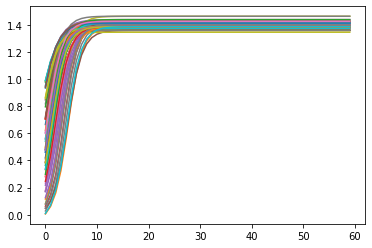

In [38]:
for node_traj in xx.T:
    plt.plot(node_traj)
plt.show()

In [41]:
eps = 0.5
j = 20
perturbation = np.zeros(N)
perturbation[j] += eps

xx = odeint(neu.Model_Neuronal_array, xx.T[-1]+perturbation, times, args = (G, *args))

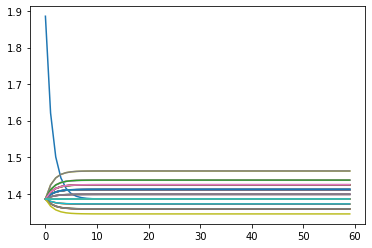

In [42]:
for node_traj in xx.T:
    plt.plot(node_traj)
plt.show()